In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Finding the outliers using the Z-Score

In [8]:
dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

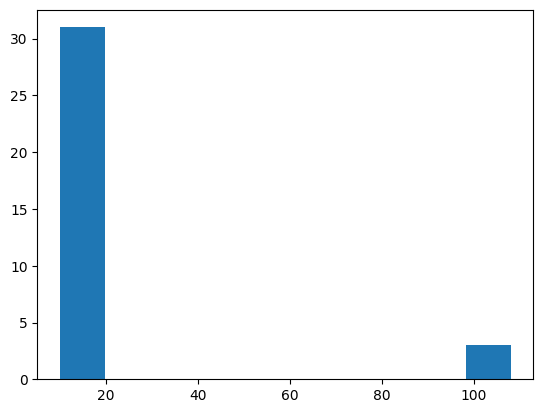

In [9]:
plt.hist(dataset)

In [6]:
outliers = []

def detect_outliers(data):
    threshold = 3
    mean = np.mean(data)
    sd = np.std(data)
    
    for i in data:
        z_score = (i-mean) / sd
        if(np.abs(z_score) > threshold):
            outliers.append(i)
    return outliers

In [7]:
detect_outliers(dataset)

[102, 107, 108]

### Finding the outliers using the IQR

In [11]:
# 1) Sort the Data
# 2) Find the values of Q1 and Q3
# 3) Find IQR (Q3-Q1)
# 4) Find the upper and the lower fence 
# 5) Lower fence = Q1 - 1.5*(IQR)
# 6) Upper fence = Q3 + 1.5*(IQR)

In [15]:
# 1) Sorting the dataset
dataset = sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [24]:
q1, q3 = np.percentile(dataset,[25,75])

In [26]:
q1

12.0

In [27]:
q3

15.0

In [28]:
## Find the lower fence and upper fence
lower_fence = q1 - 1.5*(q3 - q1)
upper_fence = q3 + 1.5*(q3 - q1)

In [29]:
print(lower_fence,upper_fence)

7.5 19.5


In [31]:
outliers_iqr = []

def iqr_outliers(data,lower,upper):
    for i in data:
        if(i < lower or i > upper):
            outliers_iqr.append(i)
    return outliers_iqr

In [32]:
iqr_outliers(dataset,lower_fence,upper_fence)

[102, 107, 108]